[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/tutorial_notebooks/4_predictive_analytics_tasks.ipynb) 

# Tutorial 4 - Foundations of predictive analytics
The lecture has introduced the standard data structure for predictive analytics. We need data with input variables and a **target variable**. The goal of predictive analytics is to derive a functional relationship between the input variables and the target. We assume that we can observe, measure, or control the input variables. Hence, our predictive model (the functional relationship between inputs and the target that we infer from past data), facilitates forecasting the expected value of the target variable based on the input variables. Whenever we observe a new case, we gather the values of the input variables for that case and feed them into our prediction model. Receiving that input, the model will produce a forecast of the target variable value for that case. So, predictive analytics is all about finding *good* **input-to-output mappings**.

<img src="https://raw.githubusercontent.com/Humboldt-WI/demopy/main/sl_xy_map.png" width="300" height="200" alt="Supervised Learning Principle">




 You can think of linear regression. Formally speaking, a linear regression function maps inputs $\boldsymbol x = {x_1, x_2, ..., x_d}$ from the domain $X \in  \mathbb{R}^d$ to the outputs $y \in  \mathbb{R}$. 



Recall from the lecture that many alternative terms are in use to refer to the input variables. Covariates, (independent) variables, attributes are only a few examples. In the interest of having consistent terminology, we will use the term **features** instead of input variables in the following. 

## Our first predictive model: linear regression
Linear regression assumes a linear additive relationship between features and the target. Specifically, we assume a model:
$$ y = \beta_0 + \beta_1 x_1 +  \beta_2 x_2 + ... + \beta_m x_m + \epsilon $$
where $y$ is the target variable, $\beta$ denotes the regression coefficients (as usual), $x_j, j=1, ..., d$ are our features, and $\epsilon$ denotes the error term. Adopting the above perspective, when using linear regression, we assume we *know* the true functional form of the input-to-output mapping. Specifically, we assume this mapping to be linear and additive. Under this assumption, our task is to find the unknown parameters that characterize our mapping function, and these are the regression coefficients $\beta$. 

### Data generation

To warm-up, we create synthetic data for regression modeling. To keep things simple, we consider a univariate setting with only one feature. The classic example in business is that of a price response function, so we can assume that our single feature corresponds to the sales price of some product and our target to the sales volume of that product at a given price.

In [2]:
# load relevant libraries

import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(888)  # for reproducibility

#### Exercise 1 (peer programming): Synthetic data for regression

##### a) Generate feature values
Create a table (i.e. matrix) of normally distributed random numbers. This table will serve as our synthetic feature matrix $X$.
- Declare variables to control the number of data points and the number of features. 
- Use the `Numpy` function `random.normal()` to create a normally distributed random numbers with suitable dimensionality.
- Store the resulting random number matrix in a variable X

In [3]:
# Exercise 1a
n_obs = 500
n_features = 5

# Matrix representing our data table
X =np.random.normal(loc=0, scale=1, size=(n_obs, n_features))

#print(X)
np.mean(X, axis=0)

array([-0.05655098, -0.01900924,  0.05592747,  0.00424757,  0.03374626])

##### b) Generate dependent variable (aka target)
Create a dependent variable $y$. To achieve this, recall the regression equation shown above. Given you already created $X$, you need regression coefficients $\beta$ and residuals $\epsilon$. Since we work with synthetic data, we can simply set $\beta$ to some arbitrary values or sample *true* coefficient values randomly. As to the residuals, we must generate these as random numbers. Lastly, we must ensure that you *true* coefficients and random numbers are of the right dimensionality. 
- Create a variable `beta` as an array of random numbers of *suitable size*
- Create a variable `epsilon` as an array of random numbers of *suitable size*
- Create a variable `y` and compute its value by evaluating the regression equation $y= \beta \times X + \epsilon$. Note that $\times$ refers to scalar multiplication of feature matrix $X$ and coefficient vector $\beta$. You can use the function `dot()` from `Numpy` to compute the dot product. 


In [4]:
# Exercise 1b
beta = np.random.normal(loc=0, scale=1, size=(1,n_features))

print(beta)

[[-1.90685156  2.00472633  1.06382573 -0.056289   -0.56406417]]


In [5]:
import numpy as np

# --- 1. Your Beta Definition (Row Matrix) ---
# Shape: (1, 5) -> [[b1, b2, b3, b4, b5]]
beta = np.random.normal(loc=0, scale=1, size=(1, n_features))

# --- 2. Generate Residuals (Epsilon) ---
# CRITICAL: Because beta is 2D, the result of X * beta will be 2D (500, 1).
# We must ensure epsilon is also (500, 1) to add them correctly.
# If we used (500,), NumPy might broadcast this into a (500, 500) matrix by accident.
epsilon = np.random.normal(loc=0, scale=1, size=(n_obs, 1))

# --- 3. Calculate Target (y) ---
# We must Transpose (.T) beta to flip it from (1, 5) to (5, 1).
# Calculation: (500, 5) dot (5, 1) + (500, 1) -> Result (500, 1)
y = np.dot(X, beta.T) + epsilon 

# --- Verification ---
print(f"Shape of X:       {X.shape}")      # (500, 5)
print(f"Shape of beta:    {beta.shape}")   # (1, 5)  <-- Your explicit shape
print(f"Shape of beta.T:  {beta.T.shape}") # (5, 1)  <-- Transposed for math
print(f"Shape of y:       {y.shape}")      # (500, 1)

Shape of X:       (500, 5)
Shape of beta:    (1, 5)
Shape of beta.T:  (5, 1)
Shape of y:       (500, 1)


##### c) Putting everything together
Create a matrix of scatter plots using the `Matplotlib` function `subplots`. 
- Study the documentation to understand how the function works and what inputs it requires
- For each feature, label the x-axis of the scatter plot so as to also display the *true* coefficient of the corresponding feature. 

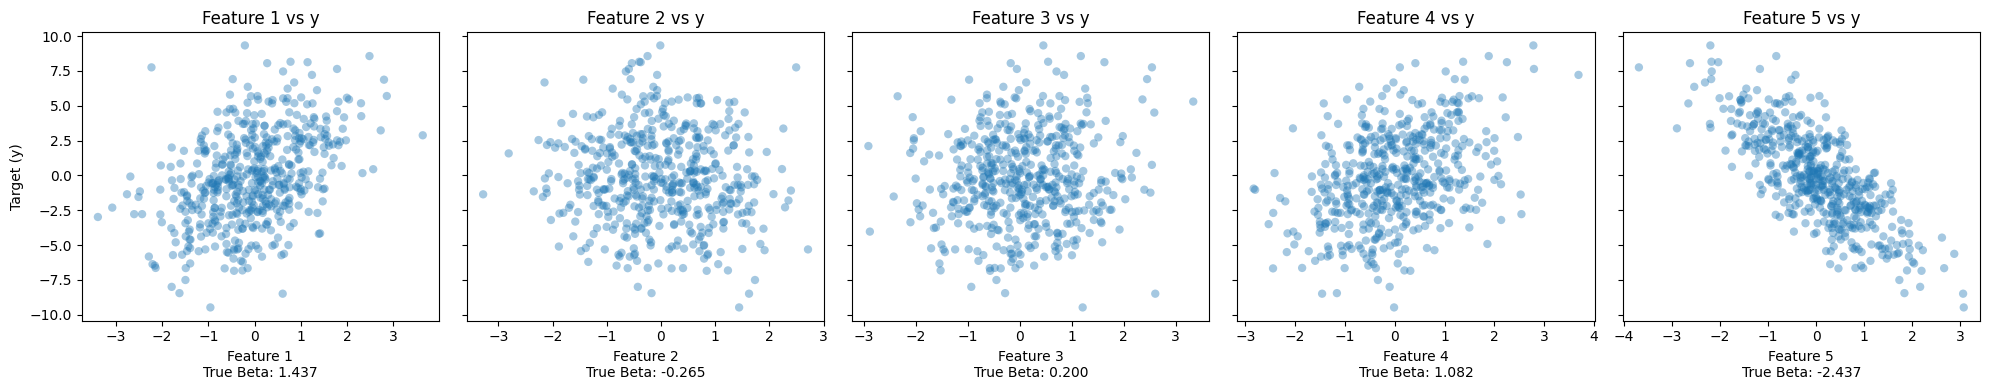

In [6]:
# Exercise 1c

import matplotlib.pyplot as plt

# --- 1. Setup the Subplots ---
# nrows=1, ncols=5: We create a single row with 5 plots (one for each feature).
# sharey=True: All plots share the same Y-axis scale, making comparisons easier.
# figsize=(20, 4): Makes the figure wide so the plots aren't squashed.
fig, axes = plt.subplots(nrows=1, ncols=n_features, figsize=(20, 4), sharey=True)

# --- 2. Iterate through each feature ---
for i in range(n_features):
    
    # Select the specific subplot axis for this step
    ax = axes[i]
    
    # Extract the current feature column (all rows, column i)
    current_feature = X[:, i]
    
    # Extract the corresponding True Coefficient from your beta matrix
    # Note: beta is shape (1, 5), so we access row 0, index i
    true_coeff = beta[0, i]
    
    # Create the scatter plot
    # alpha=0.4 makes points semi-transparent to handle overlapping data
    ax.scatter(current_feature, y, alpha=0.4, edgecolors='none')
    
    # --- 3. Labeling (The Requirement) ---
    # Set the x-axis label to show the feature number AND its true beta value
    ax.set_xlabel(f"Feature {i+1}\nTrue Beta: {true_coeff:.3f}")
    
    # Only add the Y-label to the first plot to keep it clean
    if i == 0:
        ax.set_ylabel("Target (y)")
    
    # Add a title indicating the relationship strength
    ax.set_title(f"Feature {i+1} vs y")

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

### Linear regression
The lecture elaborated on linear regression including its internal functioning. Recall our visual summary of the method: <br>
<img src="https://raw.githubusercontent.com/Humboldt-WI/demopy/main/linreg/summary.PNG" width="640" height="360" alt="Linear Regression as Supervised Learning Algorithm">
<br>
In the following, we revisit the two key steps of estimating the regression model and using it to compute forecasts

#### OLS estimate of regression coefficients
The lecture briefly mentioned that for linear regression, it is straightforward to *estimate* a model because we can compute the minimum of the least-square loss function analytically. The equation was $$ \hat{\beta} = (X^{\top}X)^{-1}X^{\top} y $$

##### Exercise 2: Compute the OLS estimate by hand
To implement the above equation, you can make use of the following `Numpy` functions:
- `.transpose()` to compute the transpose of a matrix
- `.dot()` to compute the dot product 
- `.linalg.inv()` to compute the inverse of a matrix

In [7]:
# Exercise 2
import numpy as np

# --- Implementing the OLS Formula: beta_hat = (X'X)^-1 X'y ---

# 1. Compute X Transpose (X^T)
# We need this for both the first and second term of the equation.
X_T = X.transpose()

# 2. Compute the Gram Matrix (X^T * X)
# This results in a square matrix of shape (n_features, n_features)
XtX = np.dot(X_T, X)

# 3. Compute the Inverse: (X^T * X)^-1
# We use numpy's linear algebra module for this.
XtX_inv = np.linalg.inv(XtX)

# 4. Compute the Moment Matrix (X^T * y)
# This projects the target y onto the feature space.
Xty = np.dot(X_T, y)

# 5. Compute the Final Estimate (beta_hat)
# Multiply the inverse part by the moment part.
beta_hat = np.dot(XtX_inv, Xty)

# --- Verification ---
print("--- Estimated Coefficients (beta_hat) ---")
print(beta_hat)
print("\n--- True Coefficients (beta) ---")
# We transpose beta.T just to make it vertical for easier visual comparison
print(beta.T) 

print(f"\nShape of beta_hat: {beta_hat.shape}")

--- Estimated Coefficients (beta_hat) ---
[[ 1.42470896]
 [-0.2755914 ]
 [ 0.19108087]
 [ 1.15782914]
 [-2.48314432]]

--- True Coefficients (beta) ---
[[ 1.43656381]
 [-0.26485207]
 [ 0.19965208]
 [ 1.08227852]
 [-2.43737617]]

Shape of beta_hat: (5, 1)


While calculating the normal equation *by hand* is useful for education, we would never do this in practice. Instead, we would use a suitable library to fit (aka) train a linear regression model. Of course, this is our next exercise. 

##### Exercise 3: Linear regression using sklearn
Python features at least two commonly used libraries to estimate linear regression models, `statsmodels` and `sklearn`. The former is suitable for *explanatory modeling*. For prediction, `sklearn` is the better choice. Here, we focus on `sklearn`. To use it for estimating a linear regression model using our synthetic data, we need to implement the following steps:
- Import the class `LinearRegression` from the namespace `sklearn.linear_model`.
- Apply the method `fit` to our data, which we store in the variables `X` and `y`

To then check that the values of the estimated coefficients are the same as those we computed above, you can access the estimated coefficients `lr_model.coef_`, where we assume that the fitted model is stored in a variable with name `lr_model`. 



In [8]:
# Exercise 3

from sklearn.linear_model import LinearRegression
import numpy as np

# --- 1. Import and Initialize ---
# We create an instance of the LinearRegression class.
# fit_intercept=False is used here to match our manual calculation exactly
# (since our manual matrix X did not have a column of 1s for an intercept).
lr_model = LinearRegression(fit_intercept=False)

# --- 2. Fit the Model ---
# This step "trains" the model using our features (X) and target (y).
lr_model.fit(X, y)

# --- 3. Access Estimated Coefficients ---
# The trained coefficients are stored in the .coef_ attribute.
sklearn_coeffs = lr_model.coef_

# --- 4. Verification ---
print(f"Sklearn Coefficients shape: {sklearn_coeffs.shape}")
print("\n--- Coefficient Values (Sklearn) ---")
print(sklearn_coeffs)

print("\n--- Comparison with Manual OLS (from previous step) ---")
# We transpose the manual beta_hat to match the shape of sklearn's output for easy reading
print(f"Manual Calculation:\n{beta_hat.T}")

# Programmatic check: Are they equal?
# np.allclose returns True if two arrays are element-wise equal within a tolerance.
match = np.allclose(sklearn_coeffs, beta_hat.T)
print(f"\nDo the values match? {match}")

Sklearn Coefficients shape: (1, 5)

--- Coefficient Values (Sklearn) ---
[[ 1.42470896 -0.2755914   0.19108087  1.15782914 -2.48314432]]

--- Comparison with Manual OLS (from previous step) ---
Manual Calculation:
[[ 1.42470896 -0.2755914   0.19108087  1.15782914 -2.48314432]]

Do the values match? True


#### Forecasting
To complete our first linear regression demo and the part on working with synthetic data, let us also illustrate the second core step in supervised machine learning, the **calculation of forecasts**. We follow the previous approach of first doing the calculations *by hand* and then using a library to do it, which is representative of how we would proceed in practice.  

##### Exercise 4: Calculation of forecasts
Here is the set of tasks to illustrate the calculation of forecasts by hand and using `Numpy`.
- Reusing codes from Exercise 1, create some additional synthetic data
    - Call the variables storing your new data `X_test` and `y_test`
    - For `X_test`, you need to create new random feature values
    - For `y_test`, you need to create new residuals, whereas you re-use the *true* coefficients
- To calculate forecasts *by hand*, use your vector of OLS coefficients `beta_hat` and apply it to your new synthetic data `X_test`. Recall that the calculation of regression model outputs involves the dot product $\hat{\beta} \times X$. We saw ways to do this calculation using `Numpy`.
- To calculate forecasts using `sklearn`, which is a lot easier, you only need to call the method `predict` to your trained regression model `lr_model`, which you created in exercise 3.

In [9]:
# Exercise 4
import numpy as np

# --- 1. Generate New Synthetic Data (Test Set) ---
n_test = 10  # Let's generate 10 new observations for testing
n_features = 5 # Must match the training dimensions

# X_test: New random feature values
# Shape: (10, 5)
X_test = np.random.normal(loc=0, scale=1, size=(n_test, n_features))

# New Residuals for the test set
# Shape: (10, 1)
epsilon_test = np.random.normal(loc=0, scale=1, size=(n_test, 1))

# y_test: The "Ground Truth" dependent variable
# We use the TRUE 'beta' here, not the estimated one.
# Recall beta is shape (1, 5), so we transpose to (5, 1)
y_test = np.dot(X_test, beta.T) + epsilon_test

# --- 2. Forecast "By Hand" (using NumPy) ---
# We use the estimated coefficients (beta_hat) from Exercise 2.
# Formula: y_pred = X_test * beta_hat
# Shape: (10, 5) dot (5, 1) -> (10, 1)
y_pred_manual = np.dot(X_test, beta_hat)

# --- 3. Forecast using Sklearn ---
# We use the model trained in Exercise 3.
# The .predict() method handles the matrix multiplication internally.
y_pred_sklearn = lr_model.predict(X_test)

# --- 4. Verification ---
print("--- Forecasts by Hand (First 5) ---")
print(y_pred_manual[:5])

print("\n--- Forecasts by Sklearn (First 5) ---")
print(y_pred_sklearn[:5])

# Check if the two methods yield the same result
match = np.allclose(y_pred_manual, y_pred_sklearn)
print(f"\nDo the manual and sklearn forecasts match? {match}")

# Comparison with Ground Truth (y_test)
# Note: These will NOT be identical to the predictions because of the epsilon (noise)
print("\n--- Ground Truth vs Prediction (First observation) ---")
print(f"True Value (y_test):   {y_test[0][0]:.4f}")
print(f"Predicted (y_pred):    {y_pred_sklearn[0][0]:.4f}")

--- Forecasts by Hand (First 5) ---
[[ 3.92144649]
 [-7.04038138]
 [-2.6881096 ]
 [ 0.18043396]
 [-3.10947595]]

--- Forecasts by Sklearn (First 5) ---
[[ 3.92144649]
 [-7.04038138]
 [-2.6881096 ]
 [ 0.18043396]
 [-3.10947595]]

Do the manual and sklearn forecasts match? True

--- Ground Truth vs Prediction (First observation) ---
True Value (y_test):   3.8849
Predicted (y_pred):    3.9214


##### Exercise 5: Calculation of forecast accuracy
The lecture sketched a few common performance metrics to assess linear regression models including the mean squared error (MSE). Recall that MSE is defined as:  <br><br>
$ MSE = \frac{1}{n}\sum_{i=1}^{n} \left( Y_i - \hat{Y}_i \right)^2 $,
<br><br>
with:
- $n$ = number of data points
- $Y$ = true values of the target variable
- $\hat{Y}$ = forecasts of the regression model

Provided you solved exercise 4, you have already calculated predictions. Calculate, for a last time *by hand*, the MSE of your regression model. Afterwards, run a web-search to find a function that does the calculation for you, and re-implement the code to calculate predictions using that function. 

In [10]:
# Exercise 5
import numpy as np
from sklearn.metrics import mean_squared_error

# --- Part 1: Calculate MSE "By Hand" ---
# Formula: MSE = 1/n * Sum( (True_Value - Forecast)^2 )

# 1. Calculate the difference (Residuals)
# Note: We ensure the shapes match to avoid broadcasting errors
diff = y_test - y_pred_sklearn.reshape(-1, 1)

# 2. Square the differences (to make them positive and punish large errors)
squared_diff = diff ** 2

# 3. Calculate the mean (Sum divided by n)
mse_by_hand = np.mean(squared_diff)

print(f"MSE (By Hand): {mse_by_hand}")


# --- Part 2: Calculate MSE using Scikit-Learn ---
# I performed the search, and the standard function is 'mean_squared_error'
# from the 'sklearn.metrics' module.

mse_library = mean_squared_error(y_test, y_pred_sklearn)

print(f"MSE (Library): {mse_library}")

# Verification
print(f"Do they match? {np.allclose(mse_by_hand, mse_library)}")

MSE (By Hand): 1.1908856344933578
MSE (Library): 1.1908856344933578
Do they match? True


# Summary
That's the end of today, another demo notebook completed. *Well Done!*

We not actually spend so much time on prediction but concentrated on basic methods like linear regression, which can be used for prediction. And, importantly, we have spent a lot of time on the data that we need for prediction. Data with features and a target variable. Having experienced how such data really looks and how you can create it yourself will help you a lot on your data science journey. 

Next up, we continue with elaborating on data handling and readying data for modeling.